In [69]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas import ExcelWriter

In [45]:
def load_data(in_file):
    SM_ML_df = pd.read_excel(in_file, sheet_name='SM_ML_values')
    reqd_data_arr = ['Plot_Id', 'Crop_Type', 'Field_SM', 'rsm_VATI', 'max_RSM', 'Soil_Class']
    SM_ML_df = SM_ML_df[reqd_data_arr]
    SM_ML_df.replace(0, np.nan, inplace=True)
    SM_ML_df.replace(-np.inf, np.nan, inplace=True)
    SM_ML_df = SM_ML_df.dropna(axis=0, how='any')
    return SM_ML_df

def replace_df_with_crop_classes_andMaptoInt(basepath, SM_ML_df):
    # Replacing with crop classes
    crop_class_file = basepath + 'd_crop_classes.xlsx'
    crop_class_df = pd.read_excel(crop_class_file, sheet_name='crop_classes')
    # print (crop_class_df)

    replacing_dict = {}
    for index, each_row in crop_class_df.iterrows():
    #     print (each_row, type(each_row))
        replacing_dict[each_row['Crop_Type']] = 'class' + str(each_row['Crop_Class'])
#     print (replacing_dict)

    SM_ML_df["Crop_Type"] = SM_ML_df["Crop_Type"].str.strip().replace(replacing_dict)
    # print (SM_ML_df)

    # Forming Dictionary for crop Type and replacing with integer in Crop Type Column
    Crop_Type_nparray = np.sort(SM_ML_df['Crop_Type'].str.strip().unique())
#     print (Crop_Type_nparray)

    int_toCrop_type_dict = dict(enumerate(Crop_Type_nparray))
    crop_type_toInt_dict = {y:(x+1) for x,y in int_toCrop_type_dict.items()}
#     print (int_toCrop_type_dict)
#     print(crop_type_toInt_dict)

    SM_ML_df["Crop_Type"] = SM_ML_df["Crop_Type"].str.strip().map(crop_type_toInt_dict)
#     print (SM_ML_df)
#     print(SM_ML_df['Crop_Type'].unique())
#     print(SM_ML_df['Soil_Class'].unique())
    SM_ML_df["rsm_VATI"] = SM_ML_df["rsm_VATI"] * 100
    SM_ML_df["max_RSM"] = SM_ML_df["max_RSM"] * 100
    return SM_ML_df

def make_data_ready(SM_ML_df):
    X = SM_ML_df[['Crop_Type', 'rsm_VATI', 'max_RSM', 'Soil_Class']]
    y = SM_ML_df[['Field_SM']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train, y_test
    return (X_train, X_test, y_train, y_test)

In [93]:
def tnsrflw(train_input, y_train, test_input, optimizer_type, epochs):
    train_output = y_train.values.flatten()
#     k1 = tf.Variable(10.0)
#     k2 = tf.Variable(10.0)
#     k3 = tf.Variable(10.0)
#     k4 = tf.Variable(10.0)
#     k5 = tf.Variable(10.0)
    
#     c1 = tf.Variable(10.0)
#     c2 = tf.Variable(10.0)
#     c3 = tf.Variable(10.0)
#     c4 = tf.Variable(10.0)
#     c5 = tf.Variable(10.0)
#     c6 = tf.Variable(10.0)
#     c7 = tf.Variable(10.0)
#     c8 = tf.Variable(10.0)
    
#     s1 = tf.Variable(10.0)
#     s2 = tf.Variable(10.0)
#     s3 = tf.Variable(10.0)
#     s4 = tf.Variable(10.0)
#     s5 = tf.Variable(10.0)
    
#     k1 = tf.Variable(tf.random_normal([1]))
#     k2 = tf.Variable(tf.random_normal([1]))
#     k3 = tf.Variable(tf.random_normal([1]))
#     k4 = tf.Variable(tf.random_normal([1]))
#     k5 = tf.Variable(tf.random_normal([1]))
    
    k1 = tf.constant(0.546)
    k2 = tf.constant(0.876)
    k3 = tf.constant(0.32)
    k4 = tf.constant(0.84)
    
    c1 = tf.Variable(tf.random_normal([1]))
    c2 = tf.Variable(tf.random_normal([1]))
    c3 = tf.Variable(tf.random_normal([1]))
    c4 = tf.Variable(tf.random_normal([1]))
    c5 = tf.Variable(tf.random_normal([1]))
    c6 = tf.Variable(tf.random_normal([1]))
    c7 = tf.Variable(tf.random_normal([1]))
    c8 = tf.Variable(tf.random_normal([1]))
    
    s1 = tf.Variable(tf.random_normal([1]))
    s2 = tf.Variable(tf.random_normal([1]))
    s3 = tf.Variable(tf.random_normal([1]))
    s4 = tf.Variable(tf.random_normal([1]))
    s5 = tf.Variable(tf.random_normal([1]))
    
    A = tf.placeholder("float")
    B = tf.placeholder("float")
    C = tf.placeholder("float")
    D = tf.placeholder("float")
    
    Y = tf.placeholder("float")
    
    s2_s1 = tf.where(tf.logical_and(1.9<D,D<2.1),x=s2,y=s1)
    s3_s2 = tf.where(tf.logical_and(2.9<D,D<3.1),x=s3,y=s2_s1)
    s4_s3 = tf.where(tf.logical_and(3.9<D,D<4.1),x=s4,y=s3_s2)
    s = tf.where(tf.logical_and(4.9<D,D<5.1),x=s5,y=s4_s3)
    
    c2_c1 = tf.where(tf.logical_and(1.9<A,A<2.1),x=c2,y=c1)
    c3_c2 = tf.where(tf.logical_and(2.9<A,A<3.1),x=c3,y=c2_c1)
    c4_c3 = tf.where(tf.logical_and(3.9<A,A<4.1),x=c4,y=c3_c2)
    c5_c4 = tf.where(tf.logical_and(4.9<A,A<5.1),x=c5,y=c4_c3)
    c6_c5 = tf.where(tf.logical_and(5.9<A,A<6.1),x=c6,y=c5_c4)
    c7_c6 = tf.where(tf.logical_and(6.9<A,A<7.1),x=c7,y=c6_c5)
    c = tf.where(tf.logical_and(7.9<A,A<8.1),x=c8,y=c7_c6)
    
#     pred = k1 + k2 * tf.pow(B, s) / C
    
#     pred = k1 + k2 * tf.pow(B/C, s) / tf.pow(C, k4) + k3 * tf.pow(B/C, c) / tf.pow(C, k5)

#     pred = k1 + k2 * tf.pow(B, s) / C + k3 * tf.pow(B, c) / C
    
#     pred = k1 + k2 * tf.pow(B, k3 * s + k4 * c) / tf.pow(C, k5)
    
    pred = k1 + k2 * tf.pow(B, k3 * s + k4 * c) / C
    
#     pred = k2 * tf.pow(B, k3 * s + k4 * c) / C
    
    cost = tf.reduce_max(tf.square(pred - Y))
    optimizer = optimizer_type.minimize(cost)
    
    init = tf.global_variables_initializer()

    sess = tf.Session()
    sess.run(init)
    
    step = 0
    total_steps = train_input.shape[0] * epochs
    for epoch in range(epochs):
        for (x, y) in zip(train_input, train_output):
#             print(int(x[3]))
            sess.run(optimizer, feed_dict={A:x[0],B:x[1],C:x[2],D:x[3], Y:y})
            if(step % (total_steps/4) == 0):
                print("Step", step, "of", total_steps, ":")
                k = sess.run([k1, k2, k3, k4])
                s = sess.run([s1, s2, s3, s4, s5])
                c = sess.run([c1, c2, c3, c4, c5, c6, c7, c8])
                print (k[0], k[1], k[2], k[3])
                print (s[0], s[1], s[2], s[3], s[4])
                print (c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7])
                print ("Cost: ",sess.run(cost, feed_dict={A:x[0],B:x[1],C:x[2],D:x[3], Y:y}),"\n")
            step+=1
    
    print("Step", total_steps, "of", total_steps, ":")
    k = sess.run([k1, k2, k3, k4])
    s = sess.run([s1, s2, s3, s4, s5])
    c = sess.run([c1, c2, c3, c4, c5, c6, c7, c8])
    print (k[0], k[1], k[2], k[3])
    print (s[0], s[1], s[2], s[3], s[4])
    print (c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7],"\n")
    
    y_pred_test = np.array([])
    for tst_inpt in test_input:
        y_pred_test = np.append(y_pred_test, sess.run(pred, feed_dict={A:tst_inpt[0],B:tst_inpt[1],C:tst_inpt[2],D:tst_inpt[3]}))
    
    y_pred_trn = np.array([])
    for trn_inpt in train_input:
        y_pred_trn = np.append(y_pred_trn, sess.run(pred, feed_dict={A:trn_inpt[0],B:trn_inpt[1],C:trn_inpt[2],D:trn_inpt[3]}))
    
    
    sess.close()
    return y_pred_test, y_pred_trn

In [94]:
def plot_y_vs_y_predicted(y_actual, y_pred):
    y_actual_val = y_actual.values.flatten()
    v = [0, 40, 0, 40]
    plt.axis(v)
    plt.scatter(y_actual_val, y_pred)
    plt.xlabel("Y_Actual")
    plt.ylabel("Y_Predicted")
    plt.show()
    
def number_of_points_statistics(y_test, y_pred_test, y_train, y_pred_trn):
    y_test_val = y_test.values.flatten()
    y_train_val = y_train.values.flatten()
    no_of_points_above = 0
    no_of_points_matching = 0
    no_of_points_below = 0
    
    for Y1, Y2 in zip(y_test_val, y_pred_test):
        if(0.7 * Y2 < Y1 and Y1 < 1.3 * Y2):
            no_of_points_matching += 1
        elif (Y1 < Y2):
            no_of_points_above += 1
        elif (Y2 < Y1):
            no_of_points_below += 1
    
    for Y1, Y2 in zip(y_train_val, y_pred_trn):
        if(0.7 * Y2 < Y1 and Y1 < 1.3 * Y2):
            no_of_points_matching += 1
        elif (Y1 < Y2):
            no_of_points_above += 1
        elif (Y2 < Y1):
            no_of_points_below += 1
    
    print("no_of_points_matching: ", no_of_points_matching)
    print("no_of_points_above: ", no_of_points_above)
    print("no_of_points_below: ", no_of_points_below)

In [95]:
# basepath = 'C:\\Users\\soi\\Documents\\MTECH-PROJ-Phase-2\\'
basepath = 'C:\\Users\\rukmangadan\\Documents\\MTECH-PROJ-Phase-2\\'
# basepath = 'C:\\Users\\theorist\\Documents\\MTECH-PROJ-Phase-2\\'
in_file = basepath + 'd_soil_moisture_comparison_data.xlsx'
SM_ML_df = load_data(in_file)
SM_ML_df = replace_df_with_crop_classes_andMaptoInt(basepath, SM_ML_df)
# print(SM_ML_df[SM_ML_df["Crop_Type"]==2])
X_train, X_test, y_train, y_test = make_data_ready(SM_ML_df)

In [96]:
optimizer_type = tf.train.AdamOptimizer(0.001)
epochs = 500
y_pred_test, y_pred_trn = tnsrflw(X_train, y_train, X_test, optimizer_type, epochs)

Step 0 of 341000 :
0.546 0.876 0.32 0.84
[0.6307661] [0.8181636] [-0.76632386] [-1.618963] [0.05214569]
[2.4957488] [0.60407954] [1.2918543] [0.58656245] [-0.55128485] [-0.05041222] [-0.10156735] [-0.5295681]
Cost:  39.635918 

Step 85250 of 341000 :
0.546 0.876 0.32 0.84
[0.09387037] [0.04258443] [-0.00290059] [-1.618963] [-0.0757974]
[1.9432487] [2.206527] [2.2918365] [2.352172] [2.3172016] [1.9328828] [2.2845926] [2.2206252]
Cost:  65.262825 

Step 170500 of 341000 :
0.546 0.876 0.32 0.84
[-0.01311941] [-0.06440558] [-0.10989045] [-1.618963] [-0.18278733]
[1.9840069] [2.2472851] [2.3325944] [2.3929298] [2.3579597] [1.9736409] [2.3253508] [2.261383]
Cost:  65.262825 

Step 255750 of 341000 :
0.546 0.876 0.32 0.84
[-0.12014923] [-0.17143233] [-0.21692124] [-1.618963] [-0.28981653]
[2.0247843] [2.2880585] [2.373367] [2.4337032] [2.398733] [2.014417] [2.3661237] [2.302156]
Cost:  65.26254 

Step 341000 of 341000 :
0.546 0.876 0.32 0.84
[-0.22715008] [-0.27834353] [-0.32364392] [-1.61896

In [99]:
out_file = basepath + 'output.xlsx'
writer = ExcelWriter(out_file)

X = np.vstack((X_train,X_test))
Y_actual = np.vstack((y_train,y_test))

y_pred_trn_shpd = y_pred_trn.reshape(-1,1)
y_pred_test_shpd = y_pred_test.reshape(-1,1)

# print(y_pred_trn_shpd.shape, y_pred_test_shpd.shape)
Y_pred = np.vstack((y_pred_trn_shpd,y_pred_test_shpd))
# print(X.shape, Y_actual.shape)
data = np.hstack((X,Y_actual,Y_pred))
# print(data)

result_df = pd.DataFrame({'Crop_Class':data[:,0],'rsm_VATI':data[:,1],'max_RSM':data[:,2],'Soil_Class':data[:,3],'Field_SM':data[:,4],'Y_predicted':data[:,5]})
# print(result_df)
result_df.to_excel(writer,'data')
writer.save()


no_of_points_matching:  140
no_of_points_above:  137
no_of_points_below:  481
Test Data Graph:


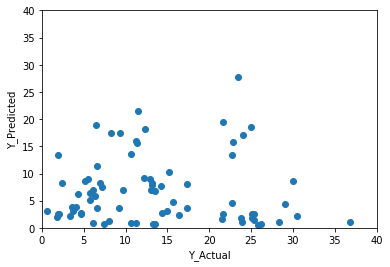

Trained Data Graph:


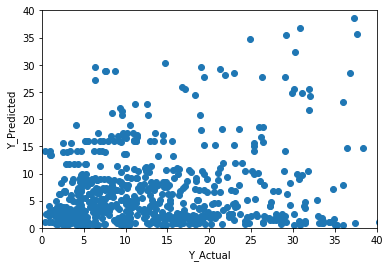

In [98]:
number_of_points_statistics(y_test, y_pred_test, y_train, y_pred_trn)
print("Test Data Graph:")
plot_y_vs_y_predicted(y_test, y_pred_test)
print("Trained Data Graph:")
plot_y_vs_y_predicted(y_train, y_pred_trn)

In [68]:
print(y_pred_test)

[ 1.95187211  7.11216021  4.13456059  2.1881969   0.77569467  4.73214531
  5.52668715  2.89849401  4.76841402 33.90640259  1.88167095  9.56651115
  3.46128774  7.43523312 11.87984848  2.98832846 16.54930687  9.73497009
 14.0841465   5.30516672  5.3523345   6.44190693  0.69911873  3.66151786
  8.172019    2.65312171 17.94115829 18.33124161  2.7396369   5.61666822
  0.70437908 18.82173729  8.1862793   6.84819412  1.14457858  8.18169975
  8.19538498  8.54933739  1.12771595  5.79307604  1.87406206  1.31574941
  2.68105054  6.62654638  7.70824146  2.02152514  0.58978695  1.34762669
 12.11924171  6.75625944  3.27082276  0.64008653  3.57217312  5.23764181
 16.54930687 11.87984848  0.75993812 21.39766121  6.91627359 10.8671875
  2.47539616 31.00341034 27.08470535 10.94797707  6.03110552  4.49399281
  9.24728394  6.23229885  0.94844508 20.18327141  5.88986015  5.56799841
  3.79961157  5.17951965  1.28413069  9.26051521]
